In [5]:
# Install the MDP toolbox
!pip install pymdptoolbox

# Import necessary packages
import mdptoolbox.example
import mdptoolbox.mdp
import numpy as np

# ---------------------------------------
# Step 1: Define Tiny Forest MDP
# ---------------------------------------
P, R = mdptoolbox.example.forest()

# Show Transition and Reward Matrices
print("Transition Matrix for Wait (P[0]):")
print(P[0])

print("\nTransition Matrix for Cut (P[1]):")
print(P[1])

print("\nReward for Wait:")
print(R[:, 0])

print("\nReward for Cut:")
print(R[:, 1])

# ---------------------------------------
# Step 2: Policy Iteration - Base Case
# ---------------------------------------
model = mdptoolbox.mdp.PolicyIteration(P, R, 0.9)  # gamma = 0.9
model.run()

# Output results
print("\nOptimal Value Function:")
print(model.V)

print("\nOptimal Policy (0=Wait, 1=Cut):")
print(model.policy)



Transition Matrix for Wait (P[0]):
[[0.1 0.9 0. ]
 [0.1 0.  0.9]
 [0.1 0.  0.9]]

Transition Matrix for Cut (P[1]):
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Reward for Wait:
[0. 0. 4.]

Reward for Cut:
[0. 1. 2.]

Optimal Value Function:
(26.244000000000014, 29.484000000000016, 33.484000000000016)

Optimal Policy (0=Wait, 1=Cut):
(0, 0, 0)


In [6]:
# Install the MDP toolbox
!pip install pymdptoolbox

# Imports
import mdptoolbox.example
import mdptoolbox.mdp

# Default Tiny Forest MDP
P, R = mdptoolbox.example.forest()

print("Reward for Cut:", R[:, 1])  # Expect [0. 1. 2.]

# Solve using Policy Iteration
model = mdptoolbox.mdp.PolicyIteration(P, R, 0.9)
model.run()

print("\nOptimal Value Function:", model.V)
print("Optimal Policy (0=Wait, 1=Cut):", model.policy)


Reward for Cut: [0. 1. 2.]

Optimal Value Function: (26.244000000000014, 29.484000000000016, 33.484000000000016)
Optimal Policy (0=Wait, 1=Cut): (0, 0, 0)


In [7]:
# Increase fire probability by parameters: S=3, r1=4, r2=2, p=0.8
P2, R2 = mdptoolbox.example.forest(3, 4, 2, 0.8)

# Solve again
model2 = mdptoolbox.mdp.PolicyIteration(P2, R2, 0.9)
model2.run()

print("Policy with High Fire Risk (p=0.8):", model2.policy)


Policy with High Fire Risk (p=0.8): (0, 1, 0)


Minimum project duration (days): 15.84620637658805
Average project duration (days): 23.4967740526603
Maximum project duration (days): 32.312216253721715


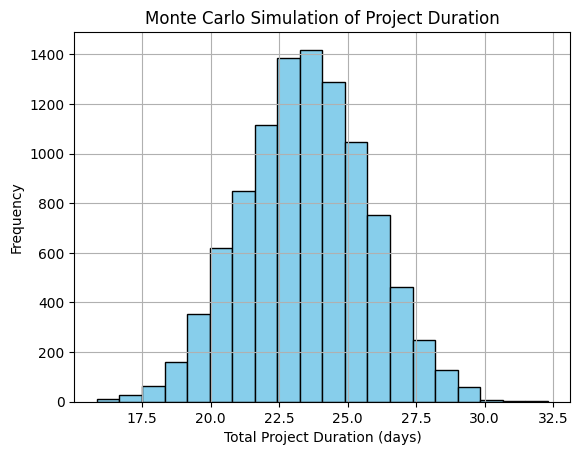

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Number of Monte Carlo simulations
N = 10000

# Define task durations using 3-point estimates: [Optimistic, Most Likely, Pessimistic]
# For example: Task 1 duration could be as short as 3 days (optimistic),
# most likely 5 days, or as long as 8 days (pessimistic)
TaskTimes = [
    [3, 5, 8],  # Task 1
    [2, 4, 7],  # Task 2
    [3, 5, 9],  # Task 3
    [4, 6, 10], # Task 4
    [3, 5, 9],  # Task 5
    [2, 6, 8]   # Task 6
]

# Calculate the mode location (Lh) parameter for triangular distribution for each task
# Lh = (Most Likely - Optimistic) / (Pessimistic - Optimistic)
Lh = [(m - a) / (b - a) for a, m, b in TaskTimes]

# Initialize an empty array to store simulated durations for each task in each run
T = np.empty((N, 6))

# List to hold total project duration for each simulation run
TotalTime = []

# Run Monte Carlo simulation N times
for p in range(N):
    for i in range(6):
        tr = np.random.random()  # Random number between 0 and 1
        a, m, b = TaskTimes[i]   # Unpack optimistic, most likely, pessimistic

        # Sample from triangular distribution:
        if tr < Lh[i]:
            # Left side of triangular distribution
            T[p][i] = a + np.sqrt(tr * (m - a) * (b - a))
        else:
            # Right side of triangular distribution
            T[p][i] = b - np.sqrt((1 - tr) * (b - m) * (b - a))

    # Calculate total project duration based on dependencies:
    # Task 1 runs first
    # Then Task 2 and Task 3 run in parallel, so take max duration
    # Then Task 4 and Task 5 run in parallel, take max duration
    # Finally Task 6 runs last
    total = T[p][0] + max(T[p][1], T[p][2]) + max(T[p][3], T[p][4]) + T[p][5]
    TotalTime.append(total)

# Convert list to numpy array for easier calculations
TotalTime = np.array(TotalTime)

# Print basic statistics about project duration
print("Minimum project duration (days):", np.min(TotalTime))
print("Average project duration (days):", np.mean(TotalTime))
print("Maximum project duration (days):", np.max(TotalTime))

# Plot histogram of project durations to visualize distribution
plt.hist(TotalTime, bins=20, color='skyblue', edgecolor='black')
plt.title("Monte Carlo Simulation of Project Duration")
plt.xlabel("Total Project Duration (days)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
